In [26]:
## Before Applying Batch Normalization
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import seaborn as sns
import time

In [8]:
data = tensorflow.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = data.load_data()

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Axes: >

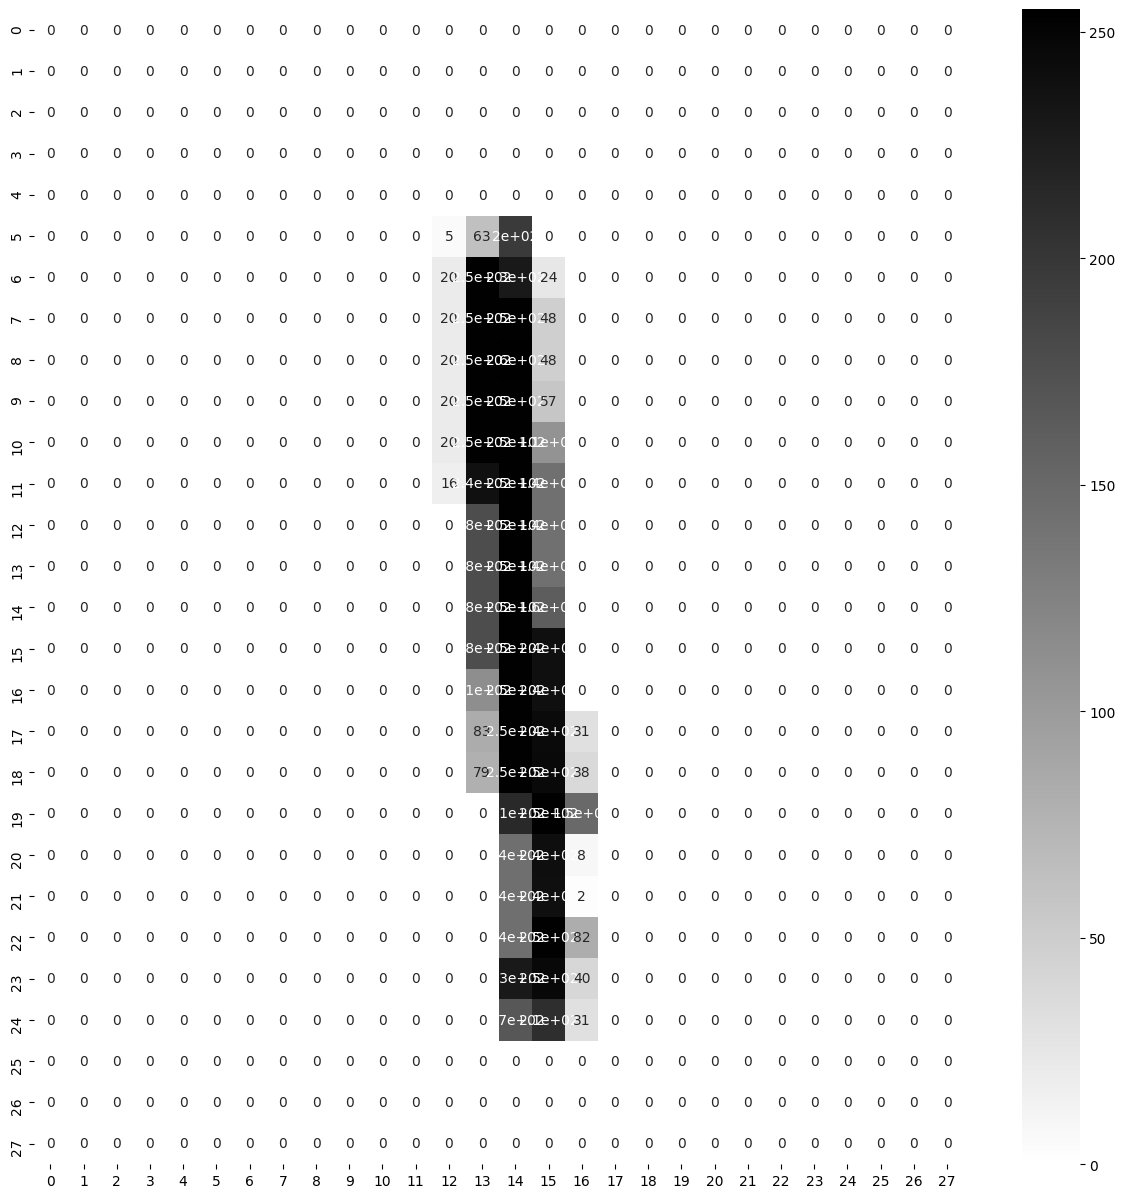

In [11]:
from matplotlib import figure
plt.figure(figsize=(15,15))
sns.heatmap(X_train[8],annot=True,cmap="binary")

In [12]:
## Applying Scalling CAlled normalization Min-max
X_valid,X_train_valid = X_train[:5000]/255.,X_train[:5000]/255.
y_valid,y_train_valid = y_train[:5000],X_train[:5000]

## Scale test data
X_test = X_test / 255.

<Axes: >

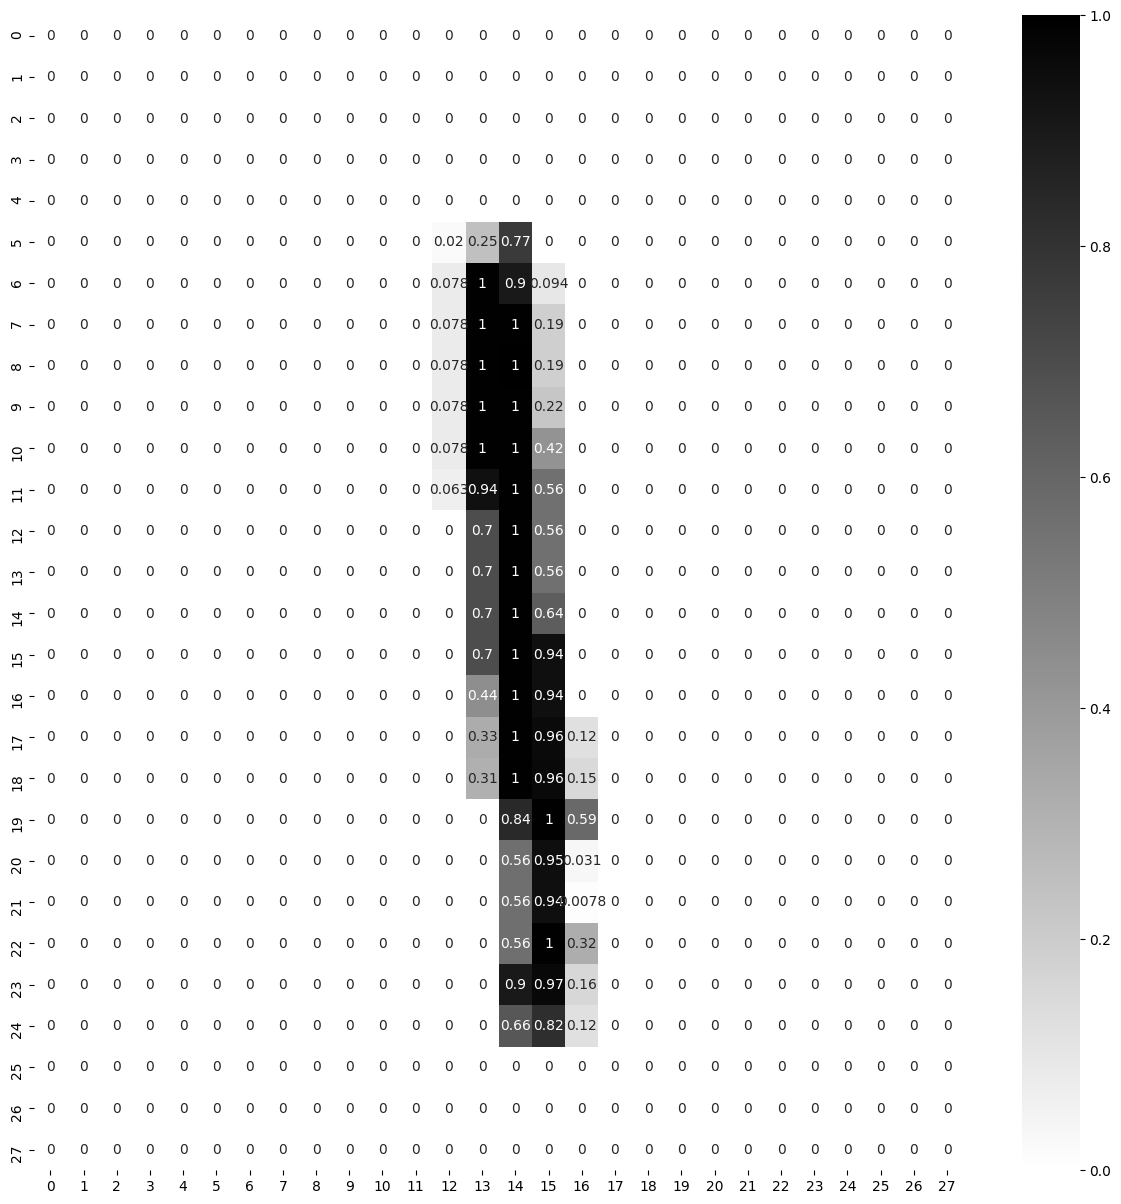

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train_valid[8],annot=True,cmap="binary")

In [18]:
model = Sequential()
model.add(Flatten(input_shape = [28,28],name="inputlayer"))
model.add(Dense(300,activation="leaky_relu",kernel_initializer="he_normal",name="hiddenlayer1"))
model.add(Dense(100,activation="leaky_relu",kernel_initializer="he_normal",name="hiddenlayer2"))
model.add(Dense(10,activation="softmax",name="outputlayer"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [23]:
start = time.time()
model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))
end = time.time()

print(f"total time{end - start}")

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.8299 - accuracy: 0.8869 - val_loss: 2.0374 - val_accuracy: 0.9216
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1750 - accuracy: 0.9205 - val_loss: 2.0252 - val_accuracy: 0.8326
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0871 - accuracy: 0.9330 - val_loss: 2.0073 - val_accuracy: 0.7672
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8869 - accuracy: 0.9441 - val_loss: 1.9834 - val_accuracy: 0.6776
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7672 - accuracy: 0.9481 - val_loss: 2.0090 - val_accuracy: 0.5710
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6446 - accuracy: 0.9534 - val_loss: 2.0443 - val_accuracy: 0.4118
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5364 - accuracy: 0.9577 - val_loss: 2.0813 - val_accuracy

## After Using Batch Normalization

In [24]:
del model  # deleting previce model

In [27]:
model = Sequential()
model.add(Flatten(input_shape = [28,28],name="inputlayer"))
model.add(BatchNormalization())
model.add(Dense(300,activation="leaky_relu",kernel_initializer="he_normal",name="hiddenlayer1"))
model.add(BatchNormalization())
model.add(Dense(100,activation="leaky_relu",kernel_initializer="he_normal",name="hiddenlayer2"))
model.add(BatchNormalization())
model.add(Dense(10,activation="softmax",name="outputlayer"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [28]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [29]:
start = time.time()

model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))
end = time.time()

print(f"total time{end - start}")

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2454 - accuracy: 0.9256 - val_loss: 5.6082 - val_accuracy: 0.1126
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1290 - accuracy: 0.9602 - val_loss: 7.6434 - val_accuracy: 0.1126
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0977 - accuracy: 0.9688 - val_loss: 5.4215 - val_accuracy: 0.0868
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0828 - accuracy: 0.9733 - val_loss: 8.9279 - val_accuracy: 0.1126
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0715 - accuracy: 0.9767 - val_loss: 8.4851 - val_accuracy: 0.1126
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0604 - accuracy: 0.9806 - val_loss: 10.0797 - val_accuracy: 0.1126
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0549 - accuracy: 0.9816 - val_loss: 7.9191 - val_accur